In [75]:
%load_ext autoreload
%autoreload 2

import pathlib
import pickle
import os

import numpy as np
import pandas as pd

import scipy

import mne
from matplotlib import pyplot as plt

import constants
import dataset
import folders
import iter_topography_fork
import analysis_and_plotting_functions as aps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams.update({'font.size': 10})

In [ ]:
ds = dataset.DatasetReader(data_path=folders.database_path, preload=True)

In [165]:
def systole_diastole(blind, reg, fingers=[0,1,2,3,4,5,6,7], ms=200):
    condition_names = ['systole', 'diastole']
    subset_systole = ds.markup.loc[(ds.markup['reg'] == reg) &
                                   (ds.markup['blind'] == blind) &
                                   (ds.markup['ms_after_r']<ms) &
                                   (ds.markup['is_target'] == 1) &
                                   (ds.markup['finger'].isin(fingers))]



    subset_diastole = ds.markup.loc[(ds.markup['reg'] == reg) &
                                    (ds.markup['blind'] == blind) &
                                    (ds.markup['ms_before_r']<ms) &
                                    (ds.markup['is_target'] == 1) &
                                   (ds.markup['finger'].isin(fingers))]
    
    
    d = ds.create_mne_epochs_from_subset(subset_diastole).drop_channels(['ecg', 'A1', 'A2']).\
                                                        apply_baseline(constants.evoked_baseline).\
                                                        crop(tmin=0, tmax=0.8)
    s = ds.create_mne_epochs_from_subset(subset_systole).drop_channels(['ecg', 'A1', 'A2']).\
                                                        apply_baseline(constants.evoked_baseline).\
                                                        crop(tmin=0, tmax=0.8)

    p = aps.plot_evoked_response(evoked_dict={ 'systole': ds.create_mne_evoked_from_subset(subset_systole).\
                                                  apply_baseline(constants.evoked_baseline).\
                                                  crop(tmax=0.8).\
                                                  drop_channels(['ecg', 'A1', 'A2']),
                                               'diastole': ds.create_mne_evoked_from_subset(subset_diastole).\
                                                  apply_baseline(constants.evoked_baseline).\
                                                  crop(tmax=0.8).\
                                                  drop_channels(['ecg', 'A1', 'A2'])},
                                 title=f'')

    X = [s._data.swapaxes(1,2), 
         d._data.swapaxes(1,2)]
    print (f'number of evokeds is {X[0].shape[0]}, {X[0].shape[0]}')
    info = d.info
    times = s.times * 1e3
    stats = aps.cluster_and_plot(X, info, times, condition_names=condition_names,
                        threshold=None, n_permutations=1000, tail=1, n_jobs=-1, cutoff_pval=0.05)

### Compare systole and diastole in blind subjects with small stimuli. 

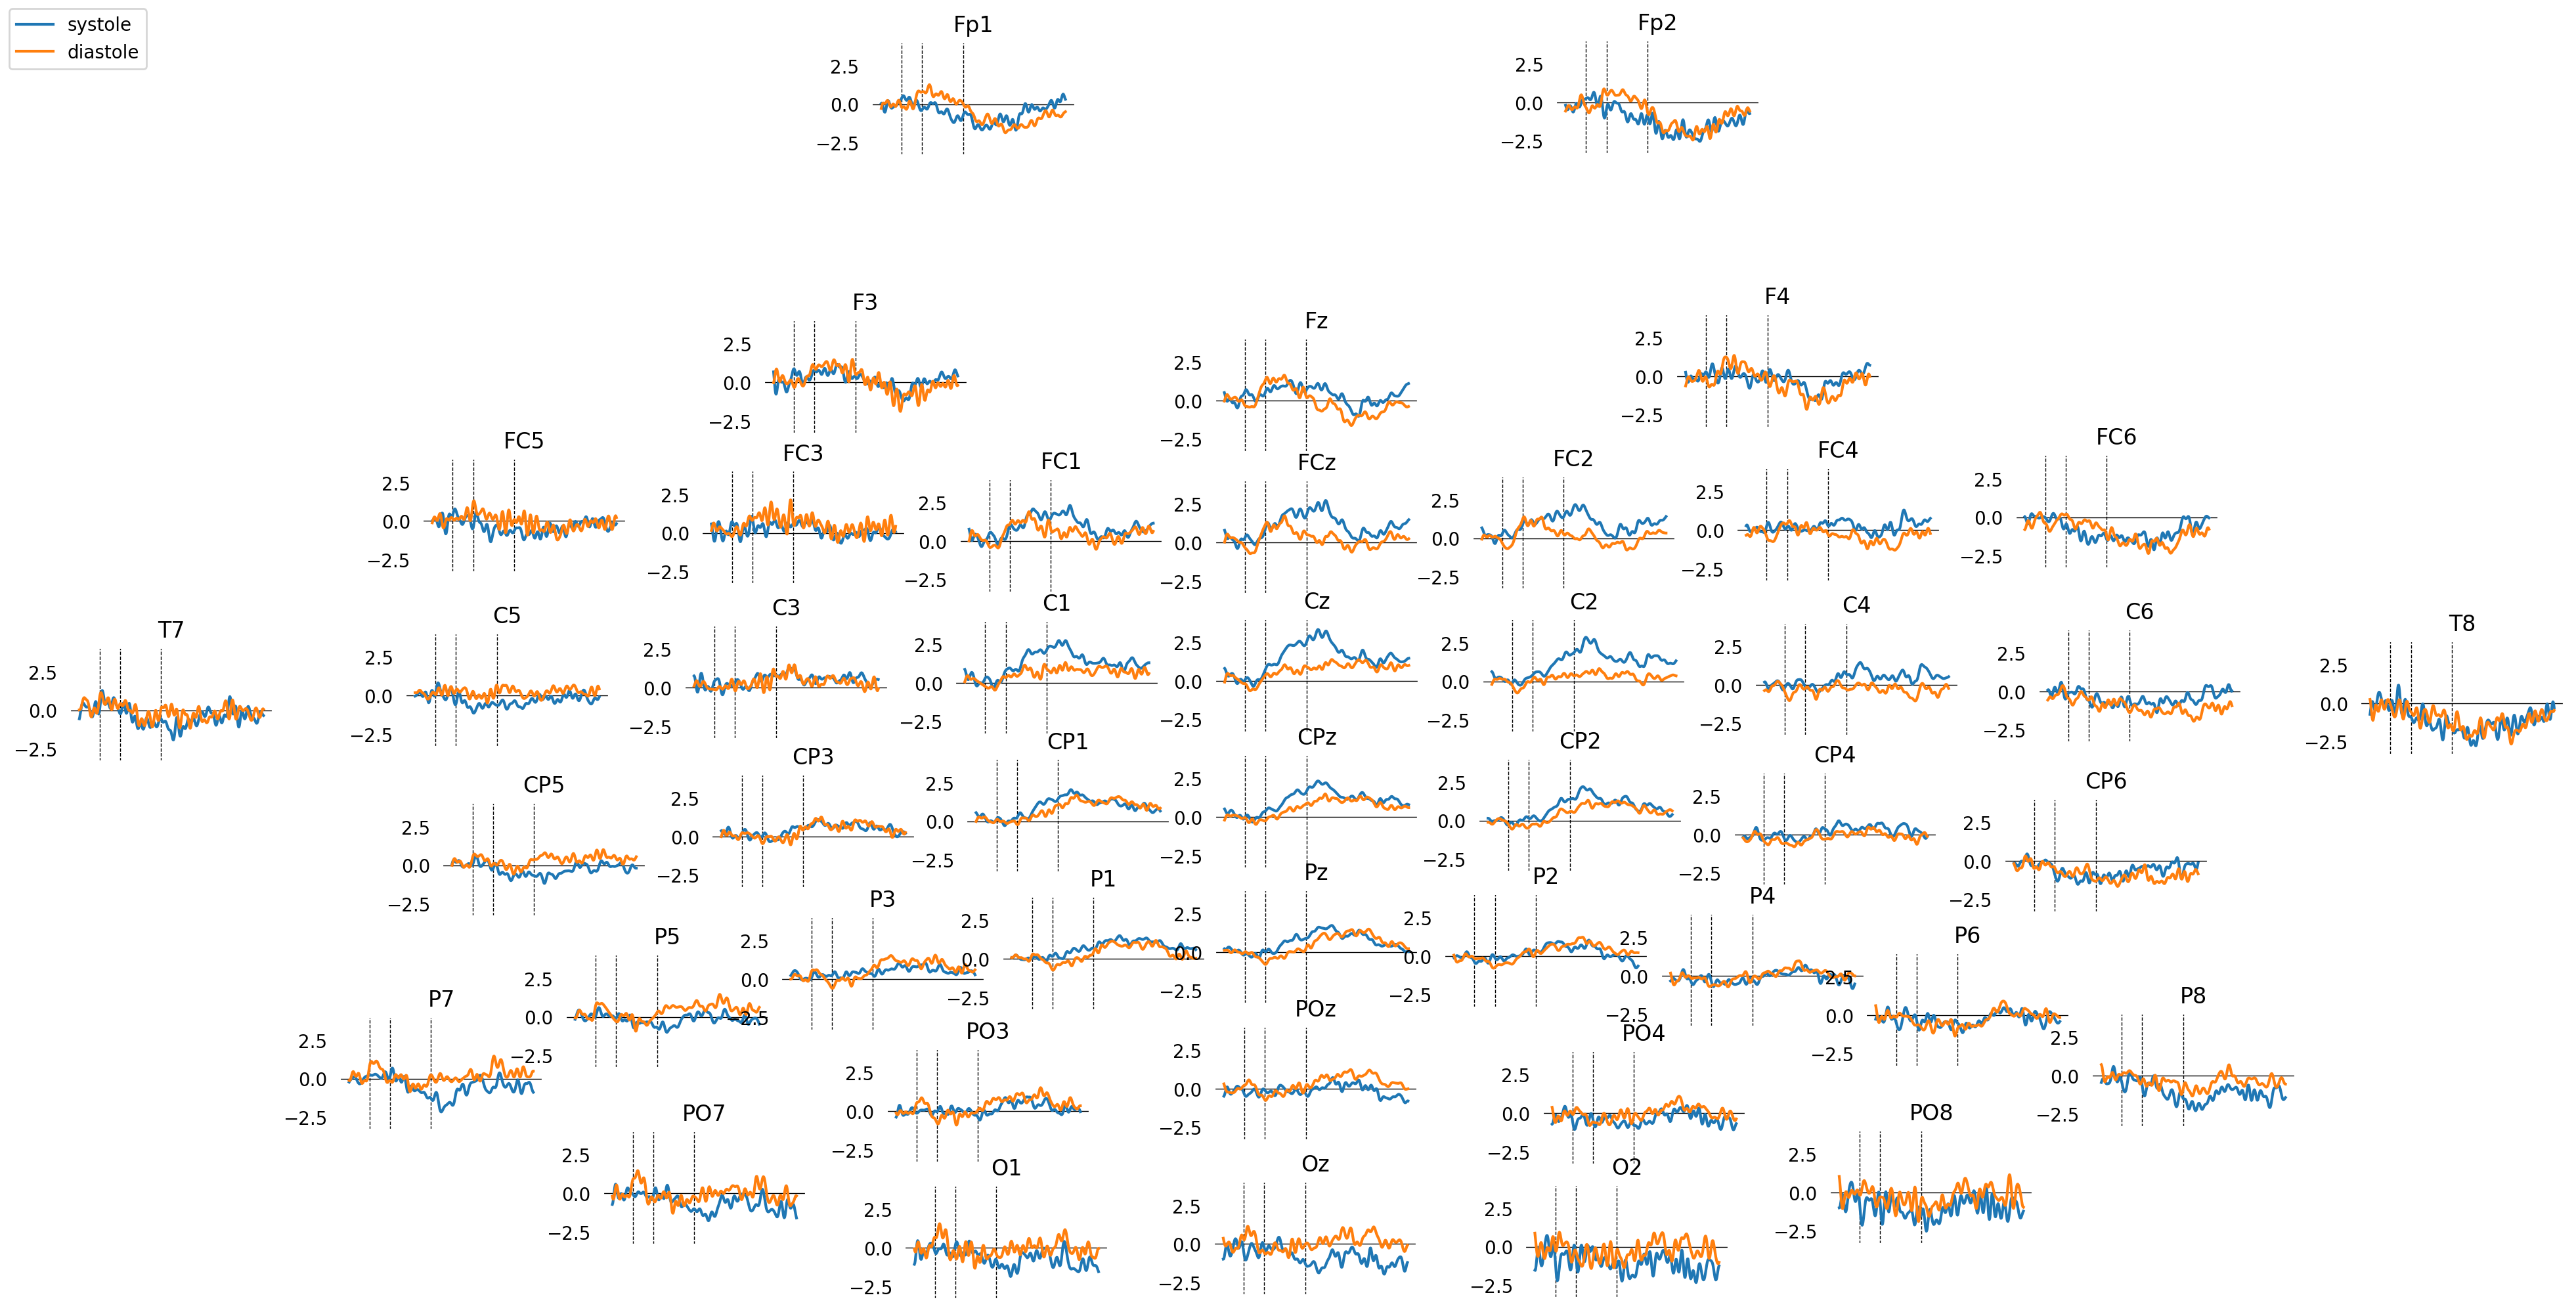

number of evokeds is 259, 259
None
[                                                            ]   0.00%  |
[0.006]
(2,) (2, 401, 45)
Mean F-score for cluster 2.6189799429086102
Cluster channels ['Fp1', 'F3', 'Fz', 'FC5', 'FC1', 'FCz', 'FC2', 'FC4', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P3', 'P1', 'Pz', 'P6', 'PO3']


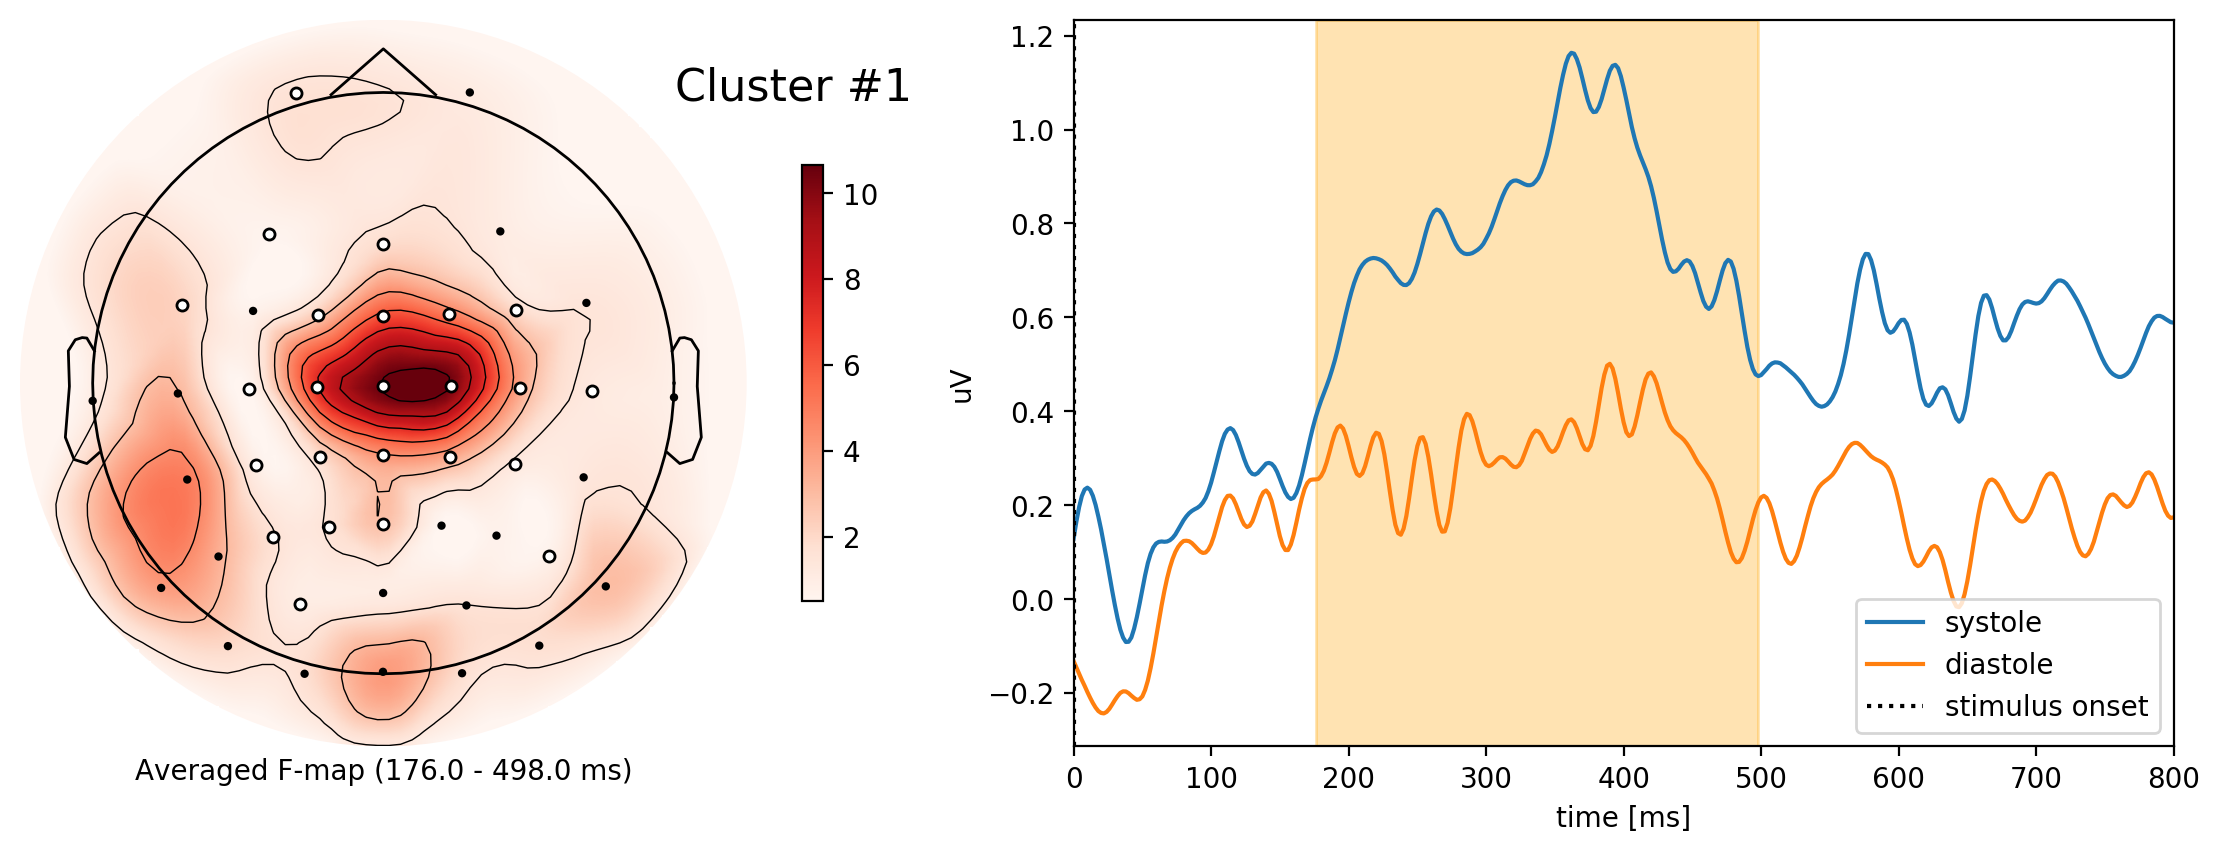

In [166]:
systole_diastole(blind=1, reg = 'small')

### Compare systole and diastole in blind subjects with large stimuli. 

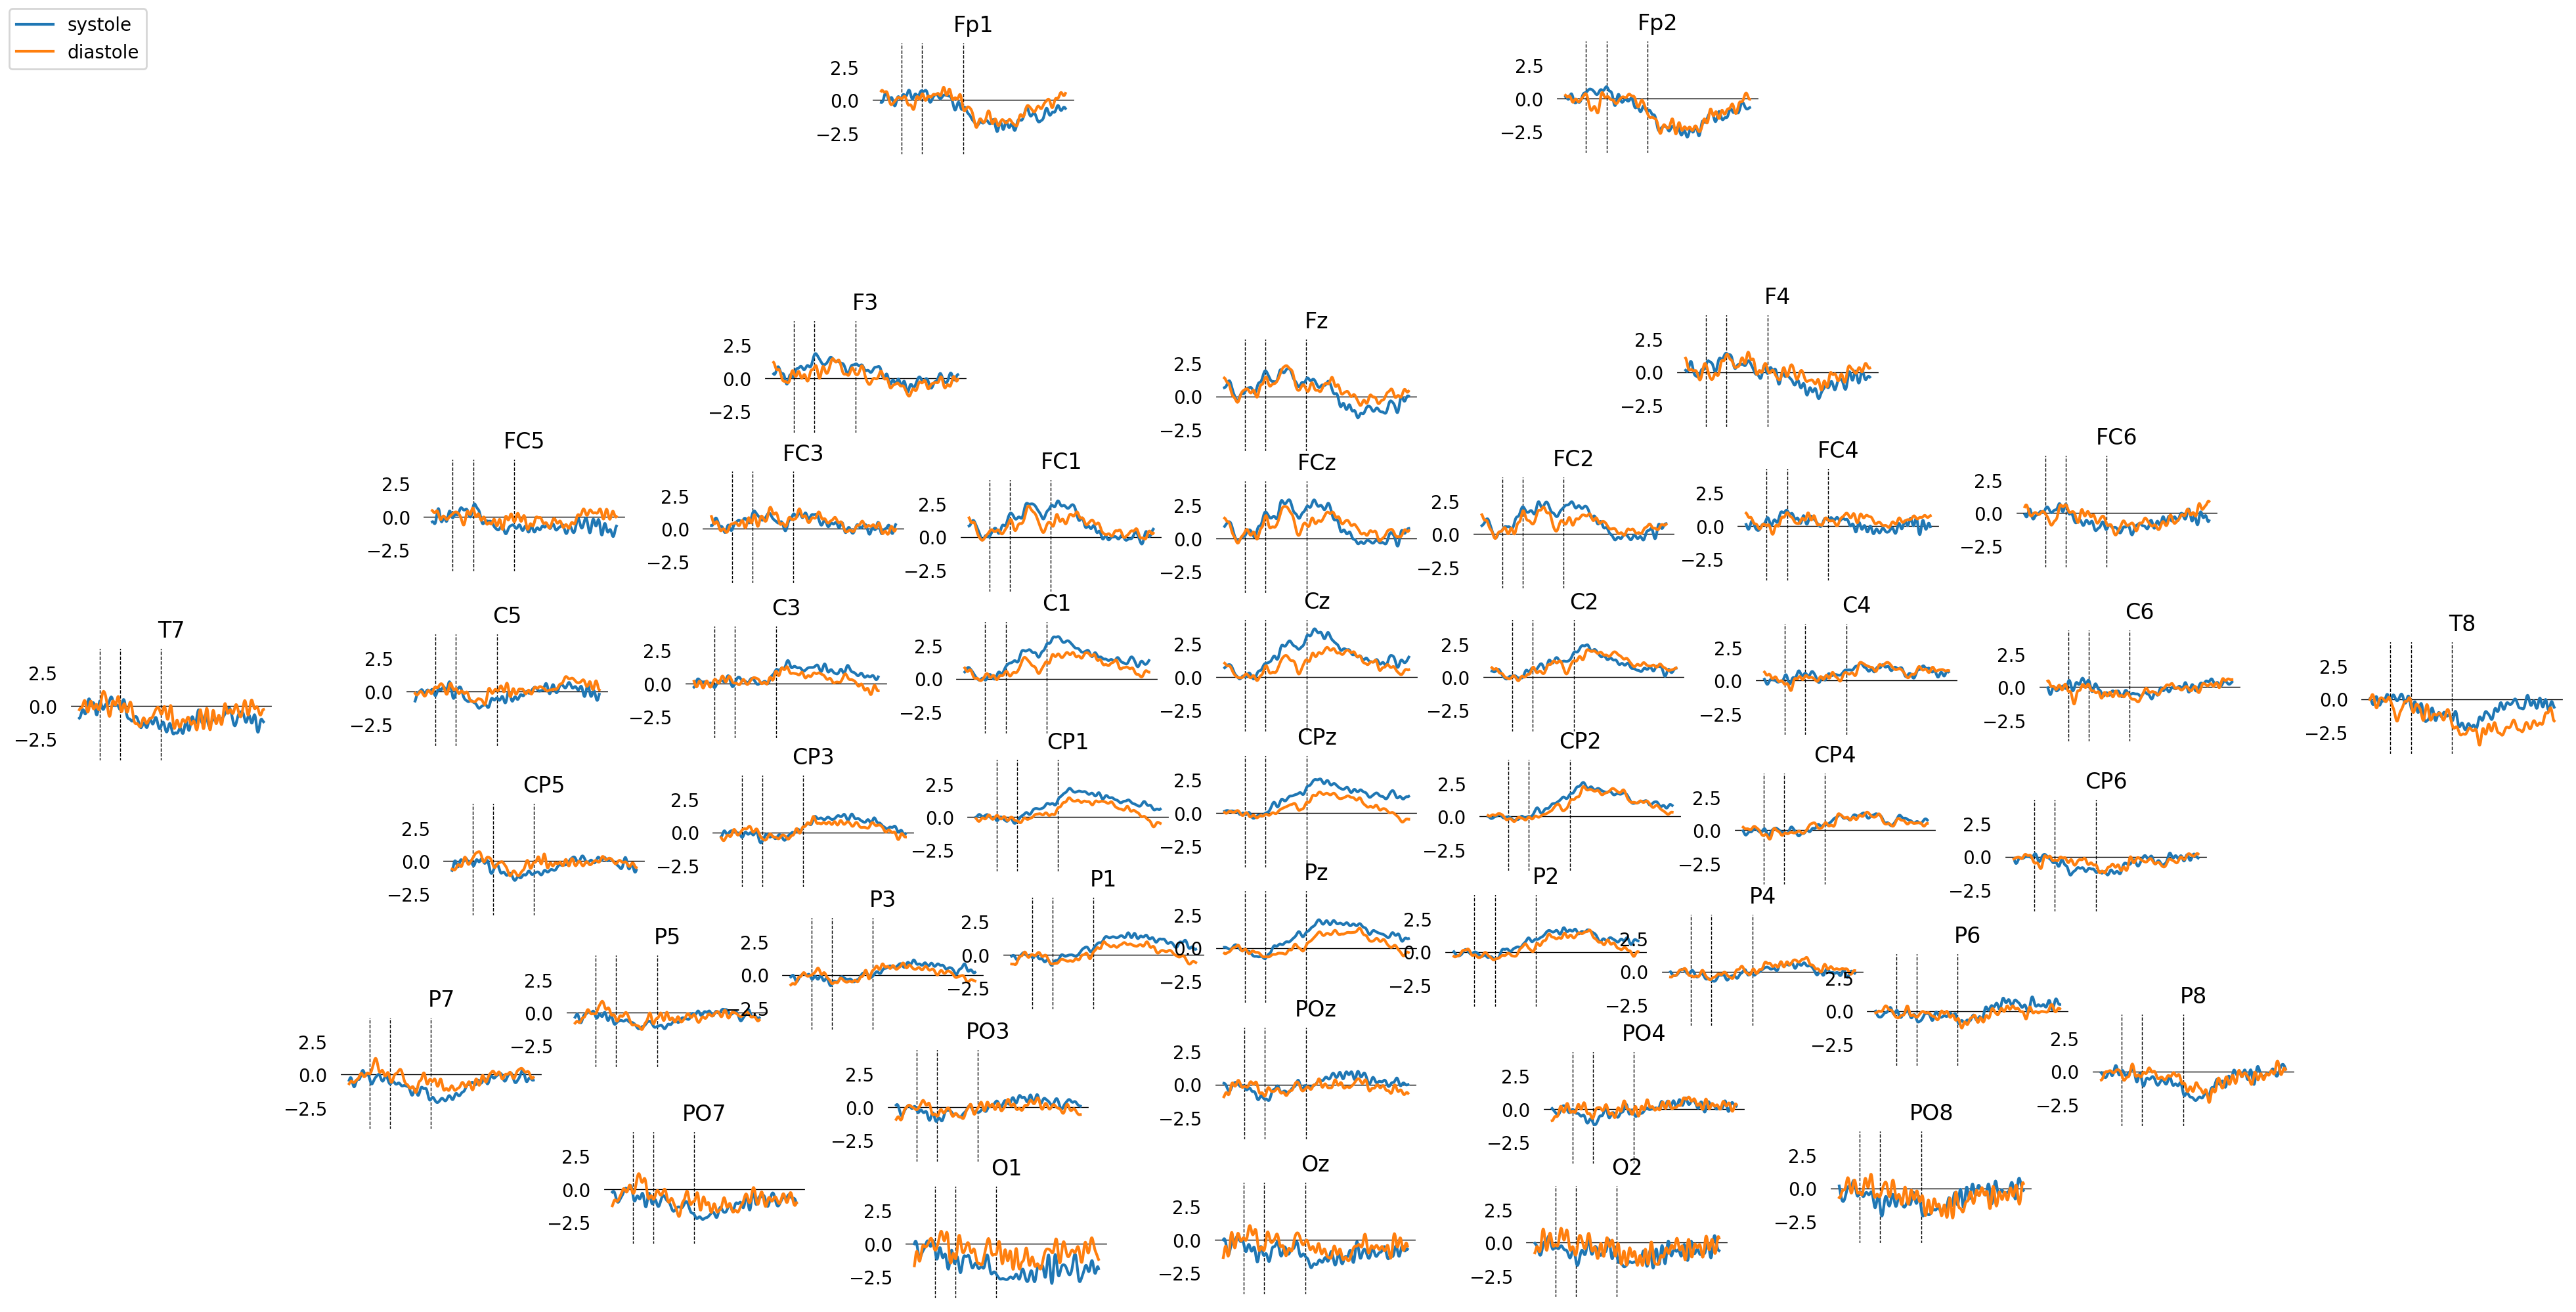

number of evokeds is 292, 292
None
[                                                            ]   0.00%  |
No significant clusters found
(2,) (2, 401, 45)


In [168]:
systole_diastole(blind=1, reg = 'large')

### Compare systole and diastole in sighted subjects with small stimuli. 

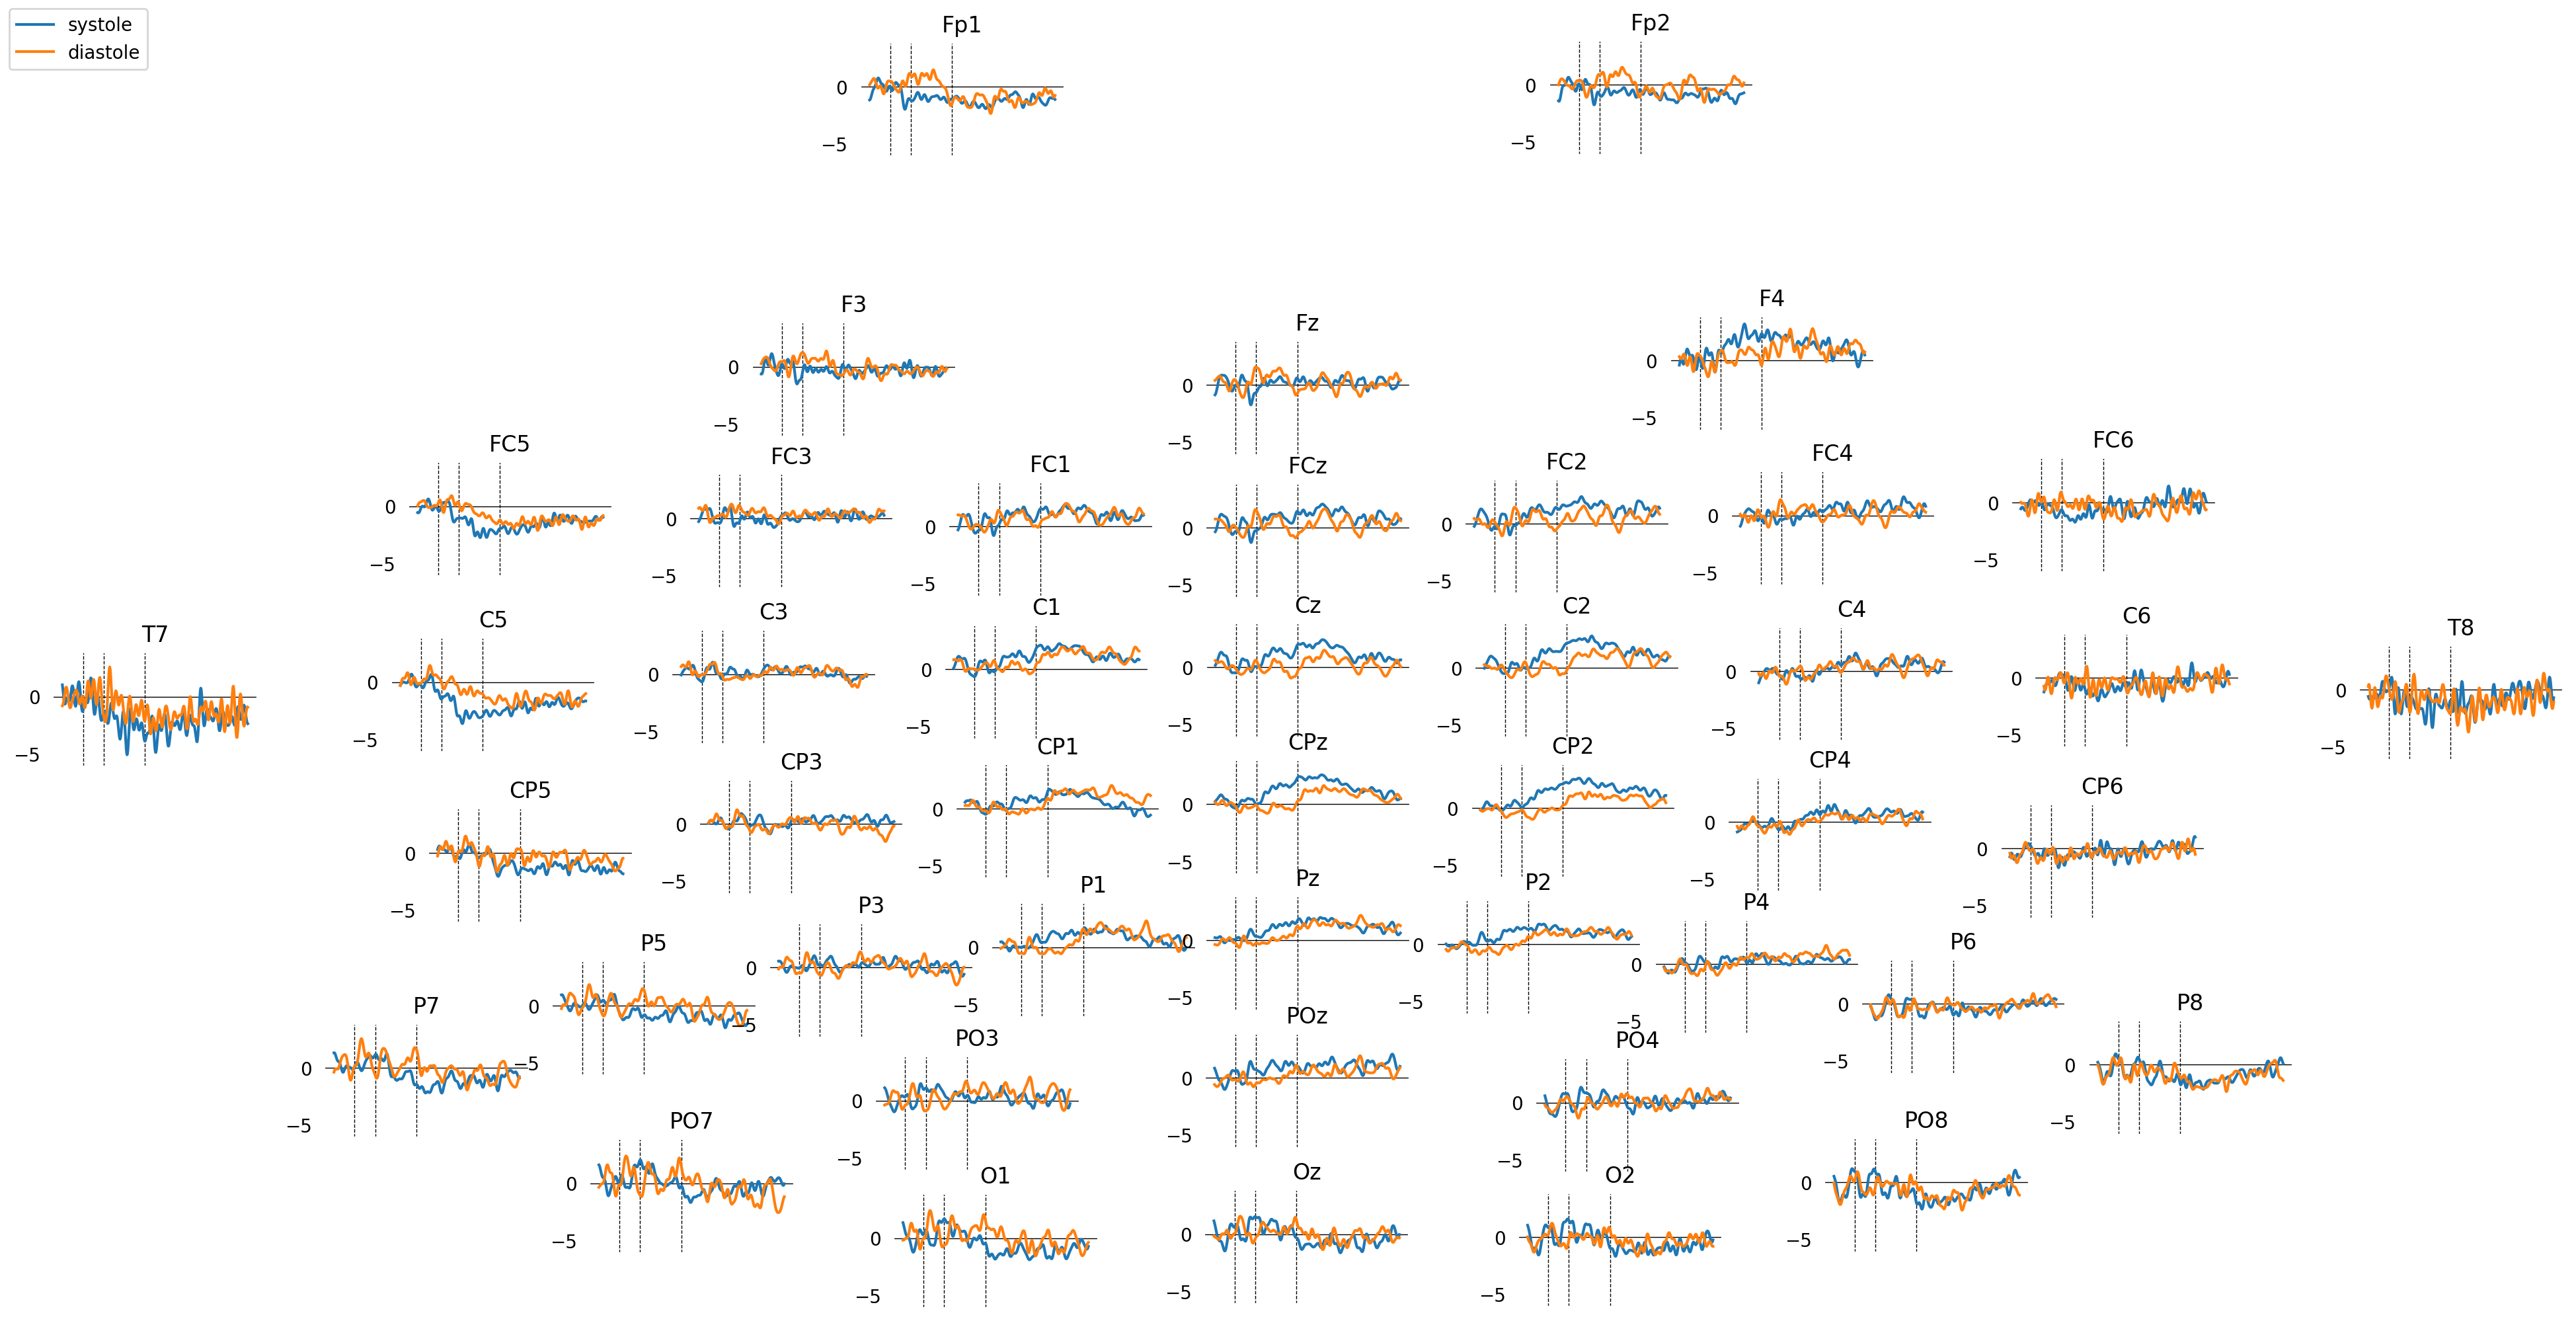

number of evokeds is 196, 196
None
[                                                            ]   0.00%  |
[0.019]
(2,) (2, 401, 45)
Mean F-score for cluster 1.7811365457045358
Cluster channels ['Fp1', 'Fp2', 'F4', 'FC5', 'FCz', 'FC2', 'C5', 'C1', 'Cz', 'C2', 'CP3', 'CP1', 'CPz', 'CP2', 'P3', 'P1', 'Pz', 'P2', 'POz']


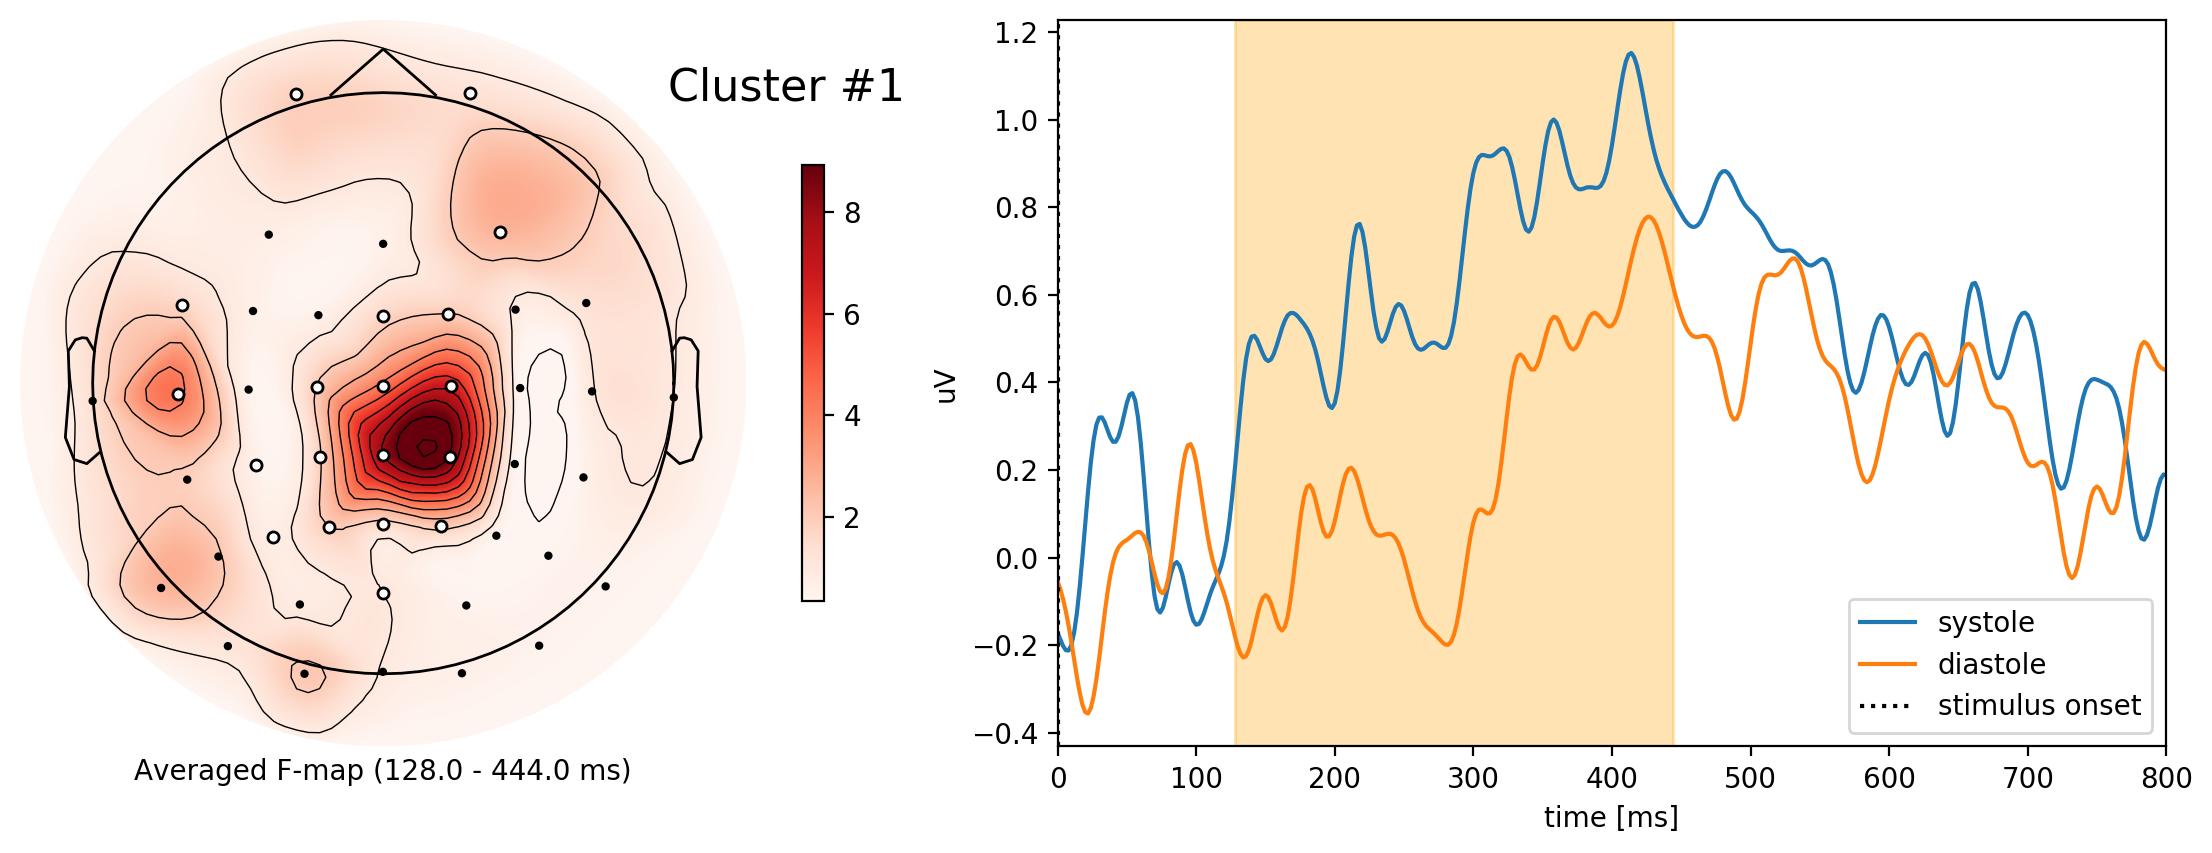

In [169]:
systole_diastole(blind=0, reg = 'small')

### Compare systole and diastole in sighted subjects with large stimuli. 

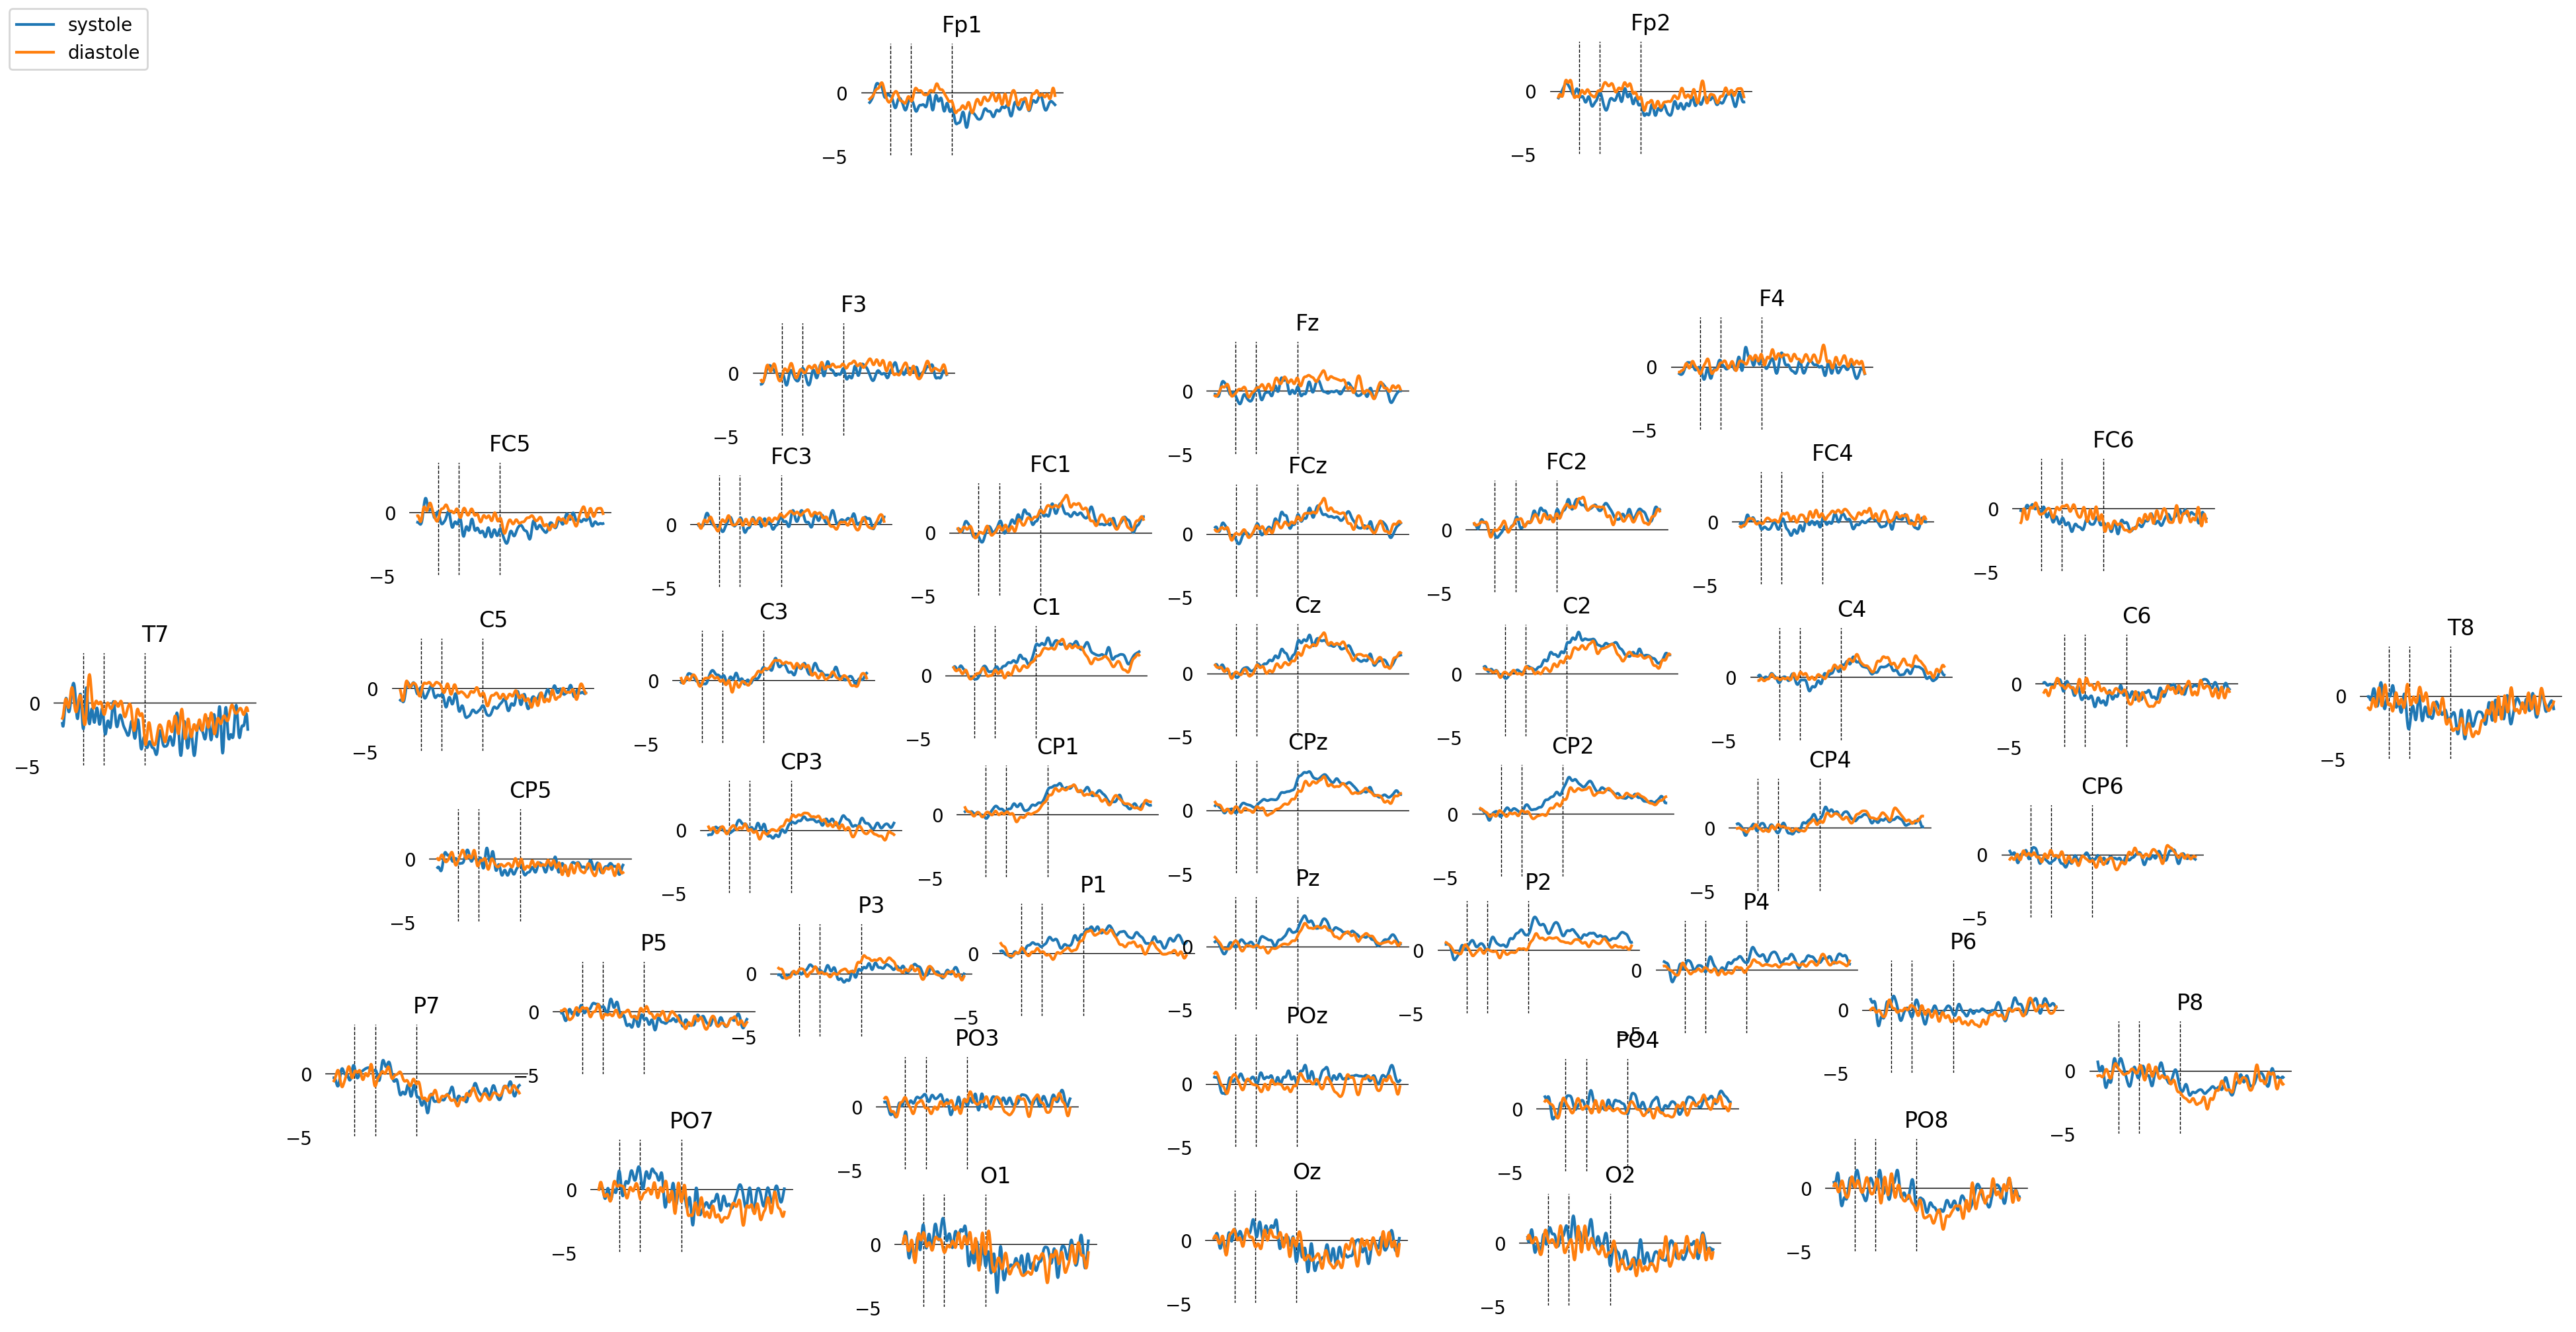

number of evokeds is 241, 241
None
[                                                            ]   0.00%  |
No significant clusters found
(2,) (2, 401, 45)


In [170]:
systole_diastole(blind=0, reg = 'large')